In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,NaN,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,NaN
1,13.20,1.78,NaN,11.2,100.0,2.65,NaN,NaN,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,NaN,3.24,0.30,2.81,NaN,1.03,3.17,NaN
3,14.37,1.95,NaN,NaN,113.0,NaN,3.49,0.24,2.18,NaN,0.86,3.45,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,NaN,NaN,7.70,NaN,1.74,740.0
174,13.40,3.91,2.48,NaN,102.0,1.80,0.75,0.43,1.41,NaN,NaN,1.56,750.0
175,NaN,4.28,2.26,20.0,120.0,1.59,0.69,NaN,1.35,NaN,NaN,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,NaN,0.68,0.53,1.46,9.30,NaN,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	60
float64		column 2	45
float64		column 3	46
float64		column 4	46
float64		column 5	15
float64		column 6	31
float64		column 7	15
float64		column 8	60
float64		column 9	30
float64		column 10	31
float64		column 11	61
float64		column 12	0
float64		column 13	16


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,118.000000,133.000000,132.000000,132.000000,163.000000,147.000000,163.000000,118.000000,148.000000,147.000000,117.000000,178.000000,162.000000
mean,13.012966,2.297143,2.369394,19.471212,99.871166,2.272381,2.040675,0.347797,1.589189,4.944422,0.947573,2.611685,734.956790
std,0.698926,1.060241,0.243673,3.082344,14.530151,0.588762,0.968218,0.108534,0.564051,2.181925,0.195692,0.709990,303.526363
min,11.030000,0.740000,1.360000,11.200000,70.000000,0.980000,0.340000,0.140000,0.410000,1.740000,0.480000,1.270000,278.000000
25%,12.480000,1.640000,2.247500,17.750000,88.000000,1.765000,1.265000,0.270000,1.250000,3.230000,0.840000,1.937500,504.000000
50%,13.050000,1.870000,2.365000,19.050000,98.000000,2.320000,2.140000,0.325000,1.545000,4.600000,0.960000,2.780000,666.000000
75%,13.507500,2.810000,2.532500,21.000000,107.000000,2.740000,2.825000,0.420000,1.927500,5.865000,1.070000,3.170000,918.750000
max,14.390000,5.800000,2.920000,30.000000,162.000000,3.880000,5.080000,0.630000,3.580000,13.000000,1.330000,4.000000,1680.000000


<AxesSubplot:>

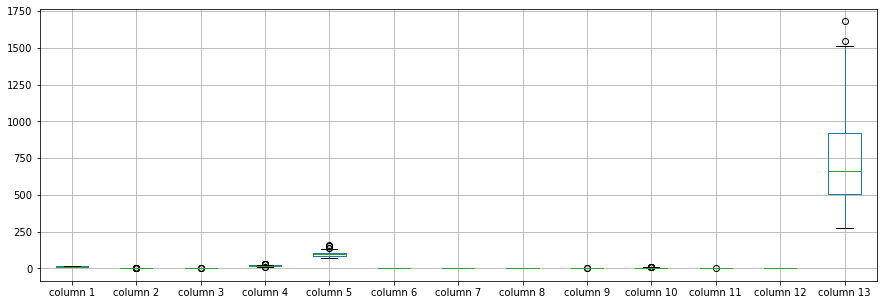

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.012966
column 2       2.297143
column 3       2.369394
column 4      19.471212
column 5      99.871166
column 6       2.272381
column 7       2.040675
column 8       0.347797
column 9       1.589189
column 10      4.944422
column 11      0.947573
column 12      2.611685
column 13    734.956790
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.137313,0.276520,-0.165405,0.291839,0.384694,0.240638,-0.198233,0.016969,0.439549,-0.060751,0.164719,0.577386
column 2,0.137313,1.000000,0.101868,0.230897,-0.117271,-0.403470,-0.460168,0.123784,-0.205013,0.198182,-0.510309,-0.431436,-0.274005
column 3,0.276520,0.101868,1.000000,0.257892,0.299826,0.241925,0.091876,0.028613,0.103094,0.214510,-0.132549,0.050470,0.240184
column 4,-0.165405,0.230897,0.257892,1.000000,-0.035242,-0.335883,-0.327523,0.374667,-0.192484,-0.014892,-0.294868,-0.325281,-0.383219
column 5,0.291839,-0.117271,0.299826,-0.035242,1.000000,0.281847,0.149720,-0.144191,0.250555,0.228490,0.154676,0.050776,0.340679
column 6,0.384694,-0.403470,0.241925,-0.335883,0.281847,1.000000,0.852421,-0.301808,0.539601,-0.006073,0.387315,0.701549,0.594083
column 7,0.240638,-0.460168,0.091876,-0.327523,0.149720,0.852421,1.000000,-0.466177,0.653729,-0.157127,0.448913,0.776803,0.436532
column 8,-0.198233,0.123784,0.028613,0.374667,-0.144191,-0.301808,-0.466177,1.000000,-0.305171,0.062829,-0.210672,-0.419355,-0.156371
column 9,0.016969,-0.205013,0.103094,-0.192484,0.250555,0.539601,0.653729,-0.305171,1.000000,-0.049674,0.243721,0.509574,0.246747
column 10,0.439549,0.198182,0.214510,-0.014892,0.228490,-0.006073,-0.157127,0.062829,-0.049674,1.000000,-0.425538,-0.407939,0.347421


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+55,13+55+55,13+55+55,13+55+55+55+55,13+55+55+55+55+55,13+55+55+55+55+55+55,13+55+55+55+55+55,13+55+55+55+55,13+55+55+55,13+55+55,13+55,13], vae_layer = False, seed = 550)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 852.8021573153409
Epoch: 1 , loss: 847.8279363458806
Epoch: 2 , loss: 848.5256847034801
Epoch: 3 , loss: 850.7911487926136
Epoch: 4 , loss: 856.4270851828835
Epoch: 5 , loss: 852.8949030095881
Epoch: 6 , loss: 856.4355246803977
Epoch: 7 , loss: 845.597001509233
Epoch: 8 , loss: 855.0154918323864
Epoch: 9 , loss: 846.616455078125
Epoch: 10 , loss: 853.8314486416904
Epoch: 11 , loss: 857.3805930397727
Epoch: 12 , loss: 858.933554909446
Epoch: 13 , loss: 857.5941661487926
Epoch: 14 , loss: 850.4184237393466
Epoch: 15 , loss: 854.3175048828125
Epoch: 16 , loss: 853.1425503817471
Epoch: 17 , loss: 849.2210748845881
Epoch: 18 , loss: 851.5499101118608
Epoch: 19 , loss: 851.5258678089489
Epoch: 20 , loss: 852.0271329012784
Epoch: 21 , loss: 856.4747258966619
Epoch: 22 , loss: 848.9704423384233
Epoch: 23 , loss: 855.5987326882102
Epoch: 24 , loss: 854.3886274857955
Epoch: 25 , loss: 855.6836658824574
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.250000
column 9       0.402818
column 10      4.500000
column 11      1.030000
column 12      3.520000
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,-12.111575,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,-1025.434650
1,0.000000,0.0,-1.309421,0.000000,0.0,0.000000,-1.75772,-0.098909,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,-2.333613,0.00000,0.000000,0.000000,-5.018264,0.000000,0.0,-1163.036362
3,0.000000,0.0,-1.401881,-9.237349,0.0,-2.706706,0.00000,0.000000,0.000000,-5.480685,0.000000,0.0,-1394.775665
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,-0.345905,-0.296949,0.000000,-0.350403,0.0,0.000000
174,0.000000,0.0,0.000000,-12.196595,0.0,0.000000,0.00000,0.000000,0.000000,-3.681480,-0.235486,0.0,0.000000
175,3.734801,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.215689,0.000000,-2.942060,0.550827,0.0,0.000000
176,0.000000,0.0,0.000000,0.000000,0.0,-0.875657,0.00000,0.000000,0.000000,0.000000,-0.298945,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3667.3451869146584, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3365130233349267

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       0.900850
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       0.775323
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      0.270744
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.430000,3.488425,127.0,2.800000,3.06000,0.280000,2.290000,5.640000,1.040000,3.92,39.565350
1,13.200000,1.78,0.830579,11.200000,100.0,2.650000,1.00228,0.161091,1.280000,4.380000,1.050000,3.40,1050.000000
2,13.160000,2.36,2.670000,18.600000,101.0,0.466387,3.24000,0.300000,2.810000,0.661736,1.030000,3.17,21.963638
3,14.370000,1.95,1.098119,7.562651,113.0,1.143294,3.49000,0.240000,2.180000,2.319315,0.860000,3.45,85.224335
4,13.240000,2.59,2.870000,21.000000,118.0,2.800000,2.69000,0.390000,1.820000,4.320000,1.040000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.450000,20.500000,95.0,1.680000,0.61000,0.174095,0.763051,7.700000,0.289597,1.74,740.000000
174,13.400000,3.91,2.480000,10.803405,102.0,1.800000,0.75000,0.430000,1.410000,3.618520,0.464514,1.56,750.000000
175,17.004801,4.28,2.260000,20.000000,120.0,1.590000,0.69000,0.645689,1.350000,7.257940,1.140827,1.56,835.000000
176,13.170000,2.59,2.370000,20.000000,120.0,0.774343,0.68000,0.530000,1.460000,9.300000,0.301055,1.62,840.000000


In [20]:
imputations[-1].to_excel("Wine_NN_20(imp).xlsx", index=False, header=False)